In [10]:
try:

    from openmdao.utils.notebook_utils import notebook_mode

except ImportError:

    !python -m pip install openmdao[notebooks]

(sec:openmdao_math)=
# Math Library (`openmdao.math`)

Certain functions are useful in a gradient-based optimization context, such as smooth activation functions or differentiable maximum/minimum functions.

Rather than provide a component that forces a user to structure their system in a certain way and add more components than necessary, the `openmdao.math` package is intended to provide a universal source for _composable_ functions that users can use within their own components.

Functions in `openmdao.math` are built using the [jax](https://github.com/google/jax).
This allows users to develop components that use these functions, along with other code written with jax, and leverage capabilities of `jax` like automatic differentiation and just-in-time compilation.

Many of these functions are focused on providing differentiable forms of strictly non-differentiable functions, such as step responses, absolute value, and minimums or maximums.
Near regions where the nominal functions would have invalid derivatives, these functions are smooth but will not perfectly match their non-smooth counterparts.

## Available Functions

```{eval-rst}
    .. autofunction:: openmdao.math.act_tanh
        :noindex:
```

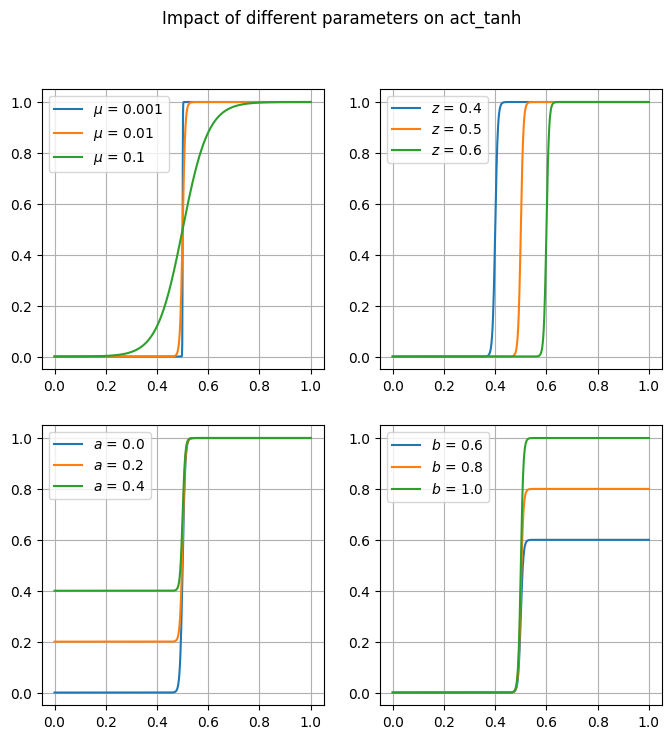

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import openmdao.math as omm

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Impact of different parameters on act_tanh')
x = np.linspace(0, 1, 1000)

mup001 = omm.act_tanh(x, mu=0.001, z=0.5, a=0, b=1)
mup01 = omm.act_tanh(x, mu=0.01, z=0.5, a=0, b=1)
mup1 = omm.act_tanh(x, mu=0.1, z=0.5, a=0, b=1)

ax[0, 0].plot(x, mup001, label=r'$\mu$ = 0.001')
ax[0, 0].plot(x, mup01, label=r'$\mu$ = 0.01')
ax[0, 0].plot(x, mup1, label=r'$\mu$ = 0.1')
ax[0, 0].legend()
ax[0, 0].grid()

zp5 = omm.act_tanh(x, mu=0.01, z=0.5, a=0, b=1)
zp4 = omm.act_tanh(x, mu=0.01, z=0.4, a=0, b=1)
zp6 = omm.act_tanh(x, mu=0.01, z=0.6, a=0, b=1)

ax[0, 1].plot(x, zp4, label=r'$z$ = 0.4')
ax[0, 1].plot(x, zp5, label=r'$z$ = 0.5')
ax[0, 1].plot(x, zp6, label=r'$z$ = 0.6')
ax[0, 1].legend()
ax[0, 1].grid()

a0 = omm.act_tanh(x, mu=0.01, z=0.5, a=0, b=1)
ap2 = omm.act_tanh(x, mu=0.01, z=0.5, a=0.2, b=1)
ap4 = omm.act_tanh(x, mu=0.01, z=0.5, a=0.4, b=1)

ax[1, 0].plot(x, a0, label=r'$a$ = 0.0')
ax[1, 0].plot(x, ap2, label=r'$a$ = 0.2')
ax[1, 0].plot(x, ap4, label=r'$a$ = 0.4')
ax[1, 0].legend()
ax[1, 0].grid()

bp6 = omm.act_tanh(x, mu=0.01, z=0.5, a=0, b=.6)
bp8 = omm.act_tanh(x, mu=0.01, z=0.5, a=0, b=.8)
b1 = omm.act_tanh(x, mu=0.01, z=0.5, a=0, b=1)

ax[1, 1].plot(x, bp6, label=r'$b$ = 0.6')
ax[1, 1].plot(x, bp8, label=r'$b$ = 0.8')
ax[1, 1].plot(x, b1, label=r'$b$ = 1.0')
ax[1, 1].legend()
ax[1, 1].grid()

```{eval-rst}
    .. autofunction:: openmdao.math.smooth_abs
        :noindex:
```

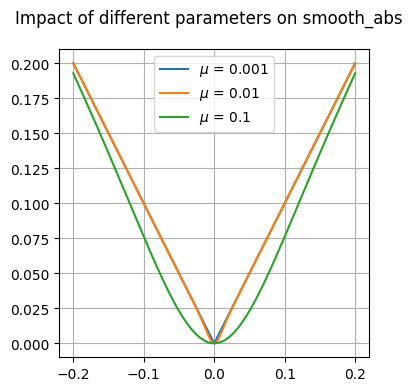

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Impact of different parameters on smooth_abs')
x = np.linspace(-0.2, 0.2, 1000)

mup001 = omm.smooth_abs(x, mu=0.001)
mup01 = omm.smooth_abs(x, mu=0.01)
mup1 = omm.smooth_abs(x, mu=0.1)

ax.plot(x, mup001, label=r'$\mu$ = 0.001')
ax.plot(x, mup01, label=r'$\mu$ = 0.01')
ax.plot(x, mup1, label=r'$\mu$ = 0.1')
ax.legend()
ax.grid()

```{eval-rst}
    .. autofunction:: openmdao.math.smooth_max
        :noindex:
```

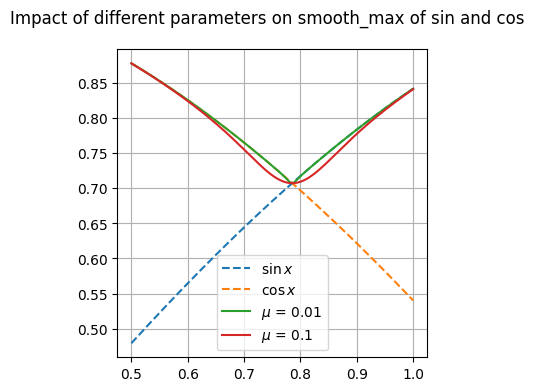

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Impact of different parameters on smooth_max of sin and cos')
x = np.linspace(0.5, 1, 1000)

sin = np.sin(x)
cos = np.cos(x)

mup001 = omm.smooth_max(sin, cos, mu=0.001)
mup01 = omm.smooth_max(sin, cos, mu=0.01)
mup1 = omm.smooth_max(sin, cos, mu=0.1)

ax.plot(x, sin, '--', label=r'$\sin{x}$')
ax.plot(x, cos, '--', label=r'$\cos{x}$')
ax.plot(x, mup01, label=r'$\mu$ = 0.01')
ax.plot(x, mup1, label=r'$\mu$ = 0.1')
ax.legend()
ax.grid()

```{eval-rst}
    .. autofunction:: openmdao.math.smooth_min
        :noindex:
```

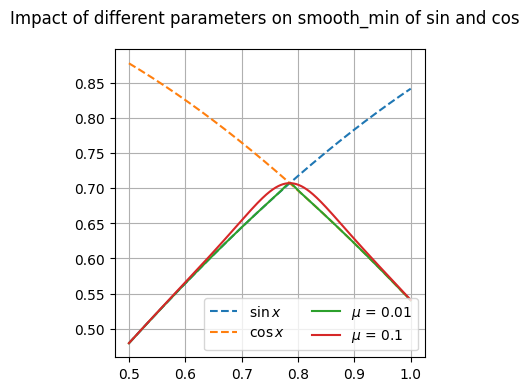

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Impact of different parameters on smooth_min of sin and cos')
x = np.linspace(0.5, 1, 1000)

sin = np.sin(x)
cos = np.cos(x)

mup001 = omm.smooth_min(sin, cos, mu=0.001)
mup01 = omm.smooth_min(sin, cos, mu=0.01)
mup1 = omm.smooth_min(sin, cos, mu=0.1)

ax.plot(x, sin, '--', label=r'$\sin{x}$')
ax.plot(x, cos, '--', label=r'$\cos{x}$')
ax.plot(x, mup01, label=r'$\mu$ = 0.01')
ax.plot(x, mup1, label=r'$\mu$ = 0.1')
ax.legend(ncol=2)
ax.grid()

```{eval-rst}
    .. autofunction:: openmdao.math.ks_max
        :noindex:
```

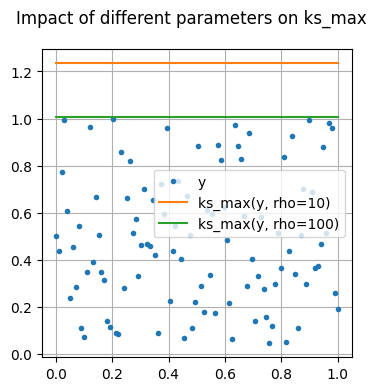

In [15]:
from openmdao.math import ks_max

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Impact of different parameters on ks_max')
y = np.random.random(100)
x = np.linspace(0, 1, 100)

rho1 = ks_max(y, rho=10.)
rho10 = ks_max(y, rho=100.)
rho100 = ks_max(y, rho=1000.)

ax.plot(x, y, '.', label='y')
ax.plot(x, rho1 * np.ones_like(x), label='ks_max(y, rho=10)')
ax.plot(x, rho10 * np.ones_like(x), label='ks_max(y, rho=100)')
ax.legend(ncol=1)
ax.grid()

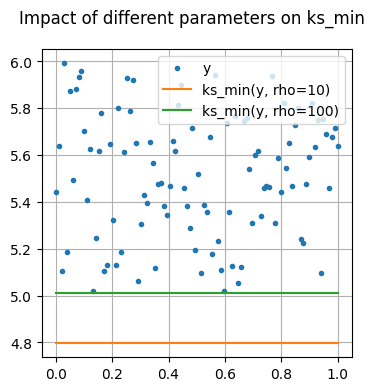

In [16]:
from openmdao.math import ks_min

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Impact of different parameters on ks_min')
y = np.random.random(100) + 5
x = np.linspace(0, 1, 100)

rho1 = ks_min(y, rho=10.)
rho10 = ks_min(y, rho=100.)
rho100 = ks_min(y, rho=1000.)

ax.plot(x, y, '.', label='y')
ax.plot(x, rho1 * np.ones_like(x), label='ks_min(y, rho=10)')
ax.plot(x, rho10 * np.ones_like(x), label='ks_min(y, rho=100)')
ax.legend(ncol=1)
ax.grid()

## Getting derivatives from jax-composed functions

If the user write a function that is composed entirely using jax-based functions (from `jax.numpy`, etc.), then `jax` will in most cases be able to provide derivatives of those functions automatically.

The library has several ways of doing this and the best approach will likely depend on the specific use-case hand.
Rather than provide a component to wrap a `jax` function and provide derivatives automatically, consider the following example as a template for how to utilize `jax` in combination with OpenMDAO components.

The following component uses the `jax` library's numpy implementation to compute the root-mean-square (rms) of an array of data.  It then passes this data through the `openmdao.math.act_tanh` activation function.

The arguments to `act_tanh` are such that it will return a value of approximately 1.0 if the rms is greater than a threshold value of 0.5, or approximately 0.0 if the rms is less than this value.  This `act_tanh` function is an activation function that smoothly transitions from 0.0 to 1.0 such that it is differentiable. Near the threhold value it will return some value between 0.0 and 1.0.

\begin{align}
\mathrm{rms\_switch} = \mathrm{act\_tanh}\left(\sqrt{\frac{1}{n}\sum{\left(x^2\right)}}\right)
\end{align}

### compute_primal

In this particular instance, we declare a method of the component named `compute_primal`.
That function name is not special to OpenMDAO and the user could call this function whatever they choose so long as it doesn't interfere with some pre-existing component method name.
In addition to the `self` argument, `compute_primal` takes positional arguments to make it compatible with `jax`.
We also wrap the method with the `jax.jit` decorator (and use `static_argnums` to inform it that the first argument (`self`) is not relevant to `jax`.

### compute
Compute in this case is just a matter of passing the values of the inputs to `compute_primal` and populating the outputs with the results.

###  compute_partials

Computing the partial derivatives across the component is done by passing the inputs to a separate method. Since there are multiple ways of computing the partials with `jax`, this example has four different `_compute_partials_xxx` methods, though only one is used.

Again, these method names are not special and are only used in the context of this example.

### _compute_partials_jacfwd

This uses the `jax.jacfwd` method to compuite the partial derivatives of the calculation with a forward differentiation approach.
This approach should be one of the faster options when there are comparatively few inputs versus outputs.

Note that because we know that we have many inputs and a single output, the jacobian of this function will be a row vector. Forward differentiation methods are a function of the number of inputs to the function, and thus will most likely be a poor choice if there are many inputs and few outputs.

Ultimately it's up to the user to know the sparsity structure when they implement the component and how to populate it correctly. For vector inputs and vector outputs, for instance, the sparsity structure is a diagonal band and the values can be extracted using the `jax.numpy.diagonal` function on the matrix returned by `jax.jacfwd` or `jax.jacrev`

### _compute_partials_jacrev

This is similar to the previous approach except `jax.jacrev` is used.

Reverse differentiation should be faster when the number of outputs of a function is significantly fewer than the number of inputs, such as in reduction operations.

### _compute_partials_jvp

`jax.jvp` normally needs to be called once for each column/index of an input variable, making a poor choice in this example. Note the code below includes a for loop that sets the _tangent_ corresponding to the sensitivity that is desired, iterating through each element and extracting the corresponding derivative.

When the sparsity structure is diagonal, as often happens with vector inputs and vector outputs, then the jacobian can be computed with only a single call to `jvp` where the tangents (seeds in OpenMDAO parlance) are 1.0 for each element of the input.

### _compute_partials_vjp

`jax.vjp` normally needs to be called once for each row/index of an output variable, making a good choice in this example. Because there is a single scalar output in this case, there is no iteration necessary in this case.

The same rule applies for diagonal jacobians. We can specify the _cotangent_ information corresponding to all outputs and evaluate the vector jacobian product a single time, as we do in this case.


### Which approach to use?

In practice, it's going to be a matter of the user profiling their code to see which of these approaches is fastest.
For the example below, some testing indicated that `vjp` was about twice as fast as the other approaches .


### `register_jax_component`, `_tree_flatten` and `_tree_unflatten`

In order to apply the `jax.jit` "just-in-time" compilation to the _methods_ of this class, we need to do a few things.

First, the `partial` function from `functools` is used to decorate the method with `jax.jit`, including information that marks the `self` argument as static. This allows the methods to have a signature that `jax.jit` can work with.

Because we're referencing `self.options` in the `compute_primal` method, we use the `_tree_flatten` and `_tree_unflatten` methods to let `jax` know how to deal with this data. The usage here assumes that we will never change the value of this option while evaluating our `compute` or `compute_partials` methods.

OpenMDAO contains the class decorator `register_jax_component` that automatically handles the registration of a class with `jax` as long as it implements the `_tree_flatten` and `_tree_unflatten` methods.

In general, these methods and the registration are only necessary if the component references some attribute of self in its jitted `compute_primal` (or equivalent) methods.


In [17]:
from functools import partial

import numpy as np
import jax
import jax.numpy as jnp

import openmdao.api as om
from openmdao.math import act_tanh


@om.register_jax_component
class RootMeanSquareSwitchComp(om.ExplicitComponent):
    
    def initialize(self):
        self.options.declare('vec_size', types=(int,))
        self.options.declare('mu', types=(float,), default=0.01)
        self.options.declare('threshold', types=(float,), default=0.5)
        
        # This option is only used for this demonstration.
        # The user only needs to implement the partials calculation method
        # that makes sense in their applicaiton.
        self.options.declare('partials_method',
                             values=('jacfwd', 'jacrev', 'jvp', 'vjp'))
    
    def setup(self):
        n = self.options['vec_size']
        self.add_input('x', shape=(n,))
        self.add_output('rms', shape=(1,))
        self.add_output('rms_switch', shape=(1,))
        
        # The partials are a dense row in this case (1 row x N inputs)
        # There is no need to specify a sparsity pattern.
        self.declare_partials(of=['rms', 'rms_switch'], wrt=['x'])

        self._partials_method = {'jacfwd': self._compute_partials_jacfwd,
                                 'jacrev': self._compute_partials_jacrev,
                                 'jvp': self._compute_partials_jvp,
                                 'vjp': self._compute_partials_vjp}

    @partial(jax.jit, static_argnums=(0,))
    def _compute_partials_jacfwd(self, x):
        deriv_func = jax.jacfwd(self.compute_primal, argnums=[0])
        # Always returns a tuple
        drms_dx, dswitch_dx = deriv_func(x)
        return drms_dx, dswitch_dx
    
    @partial(jax.jit, static_argnums=(0,))
    def _compute_partials_jacrev(self, x):
        deriv_func = jax.jacrev(self.compute_primal, argnums=[0])
        # Always returns a tuple
        drms_dx, dswitch_dx = deriv_func(x)
        return drms_dx, dswitch_dx

    @partial(jax.jit, static_argnums=(0,))
    def _compute_partials_jvp(self, x):
        # Note that JVP is a poor choice here, since the jacobian is a row vector!
        
        # Multipling the jacobian by a column vector of ones results in a scalar output,
        # and we are unable to identify the elements in the individual columns of the
        # jacobian.
        
        # Instead, we have to set one element of the tangent to 1 while the rest are zero and
        # evaluate the jvp and extract the value in the corresponding column of the jacobian.
        # We have no choice but to do this one element at a time, so if the size of x is large,
        # this gets prohibitively expensive.
        drms_dx = jnp.zeros_like(x)
        dswitch_dx = jnp.zeros_like(x)
        tangents_x = jnp.zeros_like(x)
 
        for i in range(len(x)):
            tangents_x = tangents_x.at[i].set(1.)
            # jvp always returns the primal and the jvp
            (rms, switch), (drms, dswitch) = jax.jvp(self.compute_primal,
                                                     primals=(x,),
                                                     tangents=(tangents_x,))
            drms_dx = drms_dx.at[i].set(drms)
            dswitch_dx = dswitch_dx.at[i].set(dswitch)
            tangents_x = tangents_x.at[i].set(0.)

        return drms_dx, dswitch_dx

    @partial(jax.jit, static_argnums=(0,))
    def _compute_partials_vjp(self, x):
        # VJP is a good choice here since the jacbian matrix is a row vector.
        # We can compute the jacobian with a single call of the VJP function.
   
        # vjp always returns the primal and the vjp
        primal, vjp_fun = jax.vjp(self.compute_primal, x)
        
        # Get the partials drms_dx
        cotangents = (jnp.ones_like(primal[0]), jnp.zeros_like(primal[0]))
        drms_dx = vjp_fun(cotangents)
        
        # Get teh partials drmsswitch_dx
        cotangents = (jnp.zeros_like(primal[0]), jnp.ones_like(primal[0]))
        dswitch_dx = vjp_fun(cotangents)
        
        return drms_dx, dswitch_dx
 
    @partial(jax.jit, static_argnums=(0,))
    def compute_primal(self, x):
        n = self.options['vec_size']
        mu = self.options['mu']
        z = self.options['threshold']
        rms = jnp.sqrt(jnp.sum(x**2) / n)
        return rms, act_tanh(rms, mu, z, 0.0, 1.0)
    
    def compute(self, inputs, outputs):  
        outputs['rms'], outputs['rms_switch'] = self.compute_primal(*inputs.values())
        
    def compute_partials(self, inputs, partials):
        f_partials = self._partials_method[self.options['partials_method']]
        drms_dx, dswitch_dx = f_partials(*inputs.values())
        partials['rms', 'x'] = drms_dx
        partials['rms_switch', 'x'] = dswitch_dx

    def _tree_flatten(self):
        """
        Per the jax documentation, these are the attributes
        of this class that we need to reference in the jax jitted
        methods of the class.
        There are no dynamic values or arrays, only self.options is used.
        Note that we do not change the options during the evaluation of
        these methods.
        """
        children = tuple()  # arrays / dynamic values
        aux_data = {'options': self.options}  # static values
        return (children, aux_data)

    @classmethod
    def _tree_unflatten(cls, aux_data, children):
        """
        Per the jax documentation, this method is needed by jax.jit since
        we are referencing attributes of the class (self.options) in our 
        jitted methods.
        """
        return cls(*children, **aux_data)

In the following use case, we use the `vjp` method to compute the partials. You can experiment with the other methods available for this component (`jacfwd`, `jacrev`, and `jvp` to compare timings.

Note that testing the derivatives will get much more expensive as N grows due to the number of elements in `x` that need to be perturbed during the complex-step or finite-difference processes.

In [18]:
N = 1_000
np.random.seed(16)

p = om.Problem()
p.model.add_subsystem('counter',
                      RootMeanSquareSwitchComp(vec_size=N, partials_method='vjp'),
                      promotes_inputs=['x'], promotes_outputs=['rms', 'rms_switch'])


p.setup(force_alloc_complex=True)
p.set_val('x', np.random.random(N))
p.run_model()

print('rms = ', p.get_val('rms'))
print('rms_switch = ', p.get_val('rms_switch'))

print('\nchecking partials')
with np.printoptions(linewidth=1024):
    p.check_partials(method='cs', compact_print=True);


rms =  [0.56893285]
rms_switch =  [0.99999897]

checking partials
---------------------------------------------
Component: RootMeanSquareSwitchComp 'counter'
---------------------------------------------

'<output>'   wrt '<variable>' | calc mag.  | check mag. | a(cal-chk) | r(cal-chk)
---------------------------------------------------------------------------------

'rms'        wrt 'x'          | 3.1623e-02 | 3.1623e-02 | 5.4166e-18 | 1.7129e-16
'rms_switch' wrt 'x'          | 6.5103e-06 | 6.5103e-06 | 1.1463e-16 | 1.7607e-11

############################################################################
Sub Jacobian with Largest Relative Error: RootMeanSquareSwitchComp 'counter'
############################################################################

'<output>'   wrt '<variable>' | calc mag.  | check mag. | a(cal-chk) | r(cal-chk)
---------------------------------------------------------------------------------
'rms_switch' wrt 'x'          | 6.5103e-06 | 6.5103e-06 | 1.1463e-16 